In [45]:
#=======================================================================
# EXPLORATORY DATA ANALYSIS -  PARISIAN HOUSING
#=======================================================================

In [46]:
# ------------SECTION 1:DATA IMPORT & INITIAL CHECKS--------------------

In [47]:
#Importing the necessary libraries needed for the EDA. NumPy was used for numerical data manipulation in Python, while Pandas was employed 
#for handling structured or tabular data, such as our dataset.Additionally, Pandas facilitated data preprocessing, including managing missing 
#values. For data visualization, Matplotlib and Seaborn were utilized to generate graphical representations,aiding in the exploration and 
#analysis of the dataset. Sklearn is a machine learning module that is built into Python that will be used to create the models that will idetify 
#trends in the data
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker




In [48]:
#importing the dataset into a pandas DataFrame called 'Housing_Data'
Housing_Data= pd.read_excel("Paris_housing_Data_Set.xlsx", engine="openpyxl")


In [49]:
#Checking the initial shape of the data to get an understanding of the magnitude of the data that we are working with.
Housing_Data.shape

(19999, 11)

In [50]:
#Checking the first five rows of the data to get an idea of what the data looks like. From this peek of the data,errors were identified that will be 
# addressed in the pre-processing stage
Housing_Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,3.0,7,1955.0,0,1340.0
1,538000.0,3.0,NaN,2570.0,7242.0,2.0,3.0,7,1951.0,1991,1690.0
2,180000.0,2.0,1.0,770.0,10000.0,1.0,3.0,6,1933.0,0,2720.0
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,5.0,7,1965.0,0,1360.0
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,3.0,8,1987.0,0,1800.0


In [51]:
#Checking the data types of the variables to ensure that all variables are assigned the correct data type. Variables such as built, should be integers
#and not floats to accurately reflect the nature of the data as years cannot be fractional.
Housing_Data.dtypes

price               float64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_total          float64
floors              float64
condition           float64
grade                 int64
built               float64
renovated             int64
living_area_sqft    float64
dtype: object

In [52]:
#Checking for missing values within the dataframe
Housing_Data.isnull().sum()


price                4
bedrooms            15
bathrooms           11
sqft_living          1
sqft_total           5
floors               0
condition            1
grade                0
built                1
renovated            0
living_area_sqft     6
dtype: int64

In [53]:
# ------------SECTION 2:INITIAL BASIC STATISTICAL TESTS--------------------

In [54]:
#performing a basic statistical test on the dataset to get some insights into the data. Based on this test, we can see that the houses in our dataset 
#typically have 3 bedrooms but ranges from 1 to 33 which is an outlier. The 33-bedroom property, I believe, points to the existence of luxury properties in Paris. 
#I’ve chosen not to remove this datapoint because it represents real work scenarios because Paris does have luxury properties. So, while it may skew 
#some statistics such as the mean, it provides real word insight into the luxury market in Paris.
#The houses have between 1.5 to 2.5 bathrooms. Also, most properties have 1 floor but a few have 3.5 floors.
#The column sqft_living closely resembles living_area_sqft which raises the question about if the data is redundant.
Housing_Data.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,19995.00,19984.00,19988.00,19998.00,19994.00,19999.00,19998.00,19999.00,19998.00,19999.00,19993.0
mean,535394.40,3.37,2.07,2057.94,15606.96,1.44,3.44,7.61,1967.95,90.81,1974.2
std,365921.66,0.93,0.76,905.64,41775.76,0.52,0.67,1.17,28.32,415.95,675.2
min,75000.00,1.00,0.50,290.00,520.00,1.00,1.00,1.00,1900.00,0.00,399.0
25%,317000.00,3.00,1.50,1420.00,5350.00,1.00,3.00,7.00,1950.00,0.00,1490.0
50%,449900.00,3.00,2.00,1900.00,7817.50,1.00,3.00,7.00,1969.00,0.00,1830.0
75%,640000.00,4.00,2.50,2510.00,11000.00,2.00,4.00,8.00,1991.00,0.00,2336.0
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,5.00,13.00,2015.00,2015.00,6210.0


In [55]:
#performing an initial correlation matrix. This test shows that the strongest predictor of price re sqft_living(0.70), grade(0.67) and bathrooms(0.52) while sqft_toal(0.09) 
#has minimal impact on price. Other notable mentions are bathrooms and sqft_living which have a correlation of 0.76 and grade and sqft_living which have a correlation of 0.77.
Housing_Data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
price,1.000000,0.302715,0.524730,0.701247,0.085870,0.278690,0.047269,0.665259,0.040088,0.135701,0.595678
bedrooms,0.302715,1.000000,0.515724,0.568133,0.030603,0.204928,0.033419,0.354848,0.159865,0.021052,0.376581
bathrooms,0.524730,0.515724,1.000000,0.761640,0.092467,0.505132,-0.096782,0.661418,0.488162,0.066027,0.576770
sqft_living,0.701247,0.568133,0.761640,1.000000,0.171361,0.391976,-0.046014,0.766483,0.321674,0.064575,0.753186
sqft_total,0.085870,0.030603,0.092467,0.171361,1.000000,0.015878,-0.017107,0.117585,0.076945,0.005526,0.151518
floors,0.278690,0.204928,0.505132,0.391976,0.015878,1.000000,-0.227628,0.464452,0.431733,0.027793,0.318028
condition,0.047269,0.033419,-0.096782,-0.046014,-0.017107,-0.227628,1.000000,-0.123643,-0.323934,-0.071889,-0.086868
grade,0.665259,0.354848,0.661418,0.766483,0.117585,0.464452,-0.123643,1.000000,0.435028,0.024937,0.729372
built,0.040088,0.159865,0.488162,0.321674,0.076945,0.431733,-0.323934,0.435028,1.000000,-0.219860,0.341028
renovated,0.135701,0.021052,0.066027,0.064575,0.005526,0.027793,-0.071889,0.024937,-0.219860,1.000000,0.001815


In [56]:
# ------------SECTION 3:PRE-PROCESSING--------------------

In [57]:
#Checking for rows with missing values in the dataset have missing values to determine how to handle them.The dataset contained a minimal number of 
#null entries (37 rows, representing less than 0.2% of total observations). Given their negligible impact on the overall dataset (19,999 rows) and 
#the preservation of key statistical properties post-removal, they were removed from the dataset and the analysis. 
num_of_na= Housing_Data.isna().any(axis=1).sum()
print(num_of_na)

37


In [58]:
#Since there are 37 rows with missing values they can be dropped because they are not material when compared to the number of data points 
#that are in our dataset.
Cleaned_Data=Housing_Data.dropna().copy()

In [59]:
# Checking for duplicates across all columns
duplicates = Cleaned_Data[Cleaned_Data.duplicated(keep=False)]

if not duplicates.empty:
    print(f"Found {len(duplicates)} duplicate rows:")
    print(duplicates.sort_values(list(Cleaned_Data.columns)))
else:
    print("No duplicates found in Cleaned_Data")

Found 8 duplicate rows:
          price  bedrooms  bathrooms  sqft_living  sqft_total  floors  \
547    259950.0       2.0       2.00       1070.0       649.0     2.0   
4352   259950.0       2.0       2.00       1070.0       649.0     2.0   
3950   550000.0       4.0       1.75       2410.0      8447.0     2.0   
3951   550000.0       4.0       1.75       2410.0      8447.0     2.0   
14982  585000.0       3.0       2.50       2290.0      5089.0     2.0   
14983  585000.0       3.0       2.50       2290.0      5089.0     2.0   
16380  629950.0       3.0       2.50       1680.0      1683.0     2.0   
17242  629950.0       3.0       2.50       1680.0      1683.0     2.0   

       condition  grade   built  renovated  living_area_sqft  
547          3.0      9  2008.0          0            1070.0  
4352         3.0      9  2008.0          0            1070.0  
3950         4.0      8  1936.0       1980            2520.0  
3951         4.0      8  1936.0       1980            2520.0  
149

In [60]:
# After visualling confirming that the data poinst were duplicate the duplicates were dropped but the first occurence was kept.
Cleaned_Data = Cleaned_Data.drop_duplicates()

# Verify duplicates were removed
remaining_dupes = Cleaned_Data[Cleaned_Data.duplicated()]
print(f"Remaining duplicates after dropping: {len(remaining_dupes)}")

Remaining duplicates after dropping: 0


In [61]:
## Filling missing values with 0 and converting columns to appropriate data types:
# - Integer columns:for discrete variables
# - Float columns: for continous variables
#Some variables, like the “built” year, were incorrectly stored as floats, implying fractional years. Since fractional values have no practical meaning 
#for the construction year, they were recategorized to integers.
Cleaned_Data['bedrooms'] = Cleaned_Data['bedrooms'].fillna(0).astype(float)
Cleaned_Data['floors'] = Cleaned_Data['floors'].fillna(0).astype(float)
Cleaned_Data['condition'] = Cleaned_Data['condition'].fillna(0).astype(float)
Cleaned_Data['grade'] = Cleaned_Data['grade'].fillna(0).astype(float)
Cleaned_Data['built'] = Cleaned_Data['built'].fillna(0).astype(int)
Cleaned_Data['renovated'] = Cleaned_Data['renovated'].fillna(0).astype(int)
Cleaned_Data['price'] = Cleaned_Data['price'].fillna(0).astype(float)
Cleaned_Data['bathrooms'] = Cleaned_Data['bathrooms'].fillna(0).astype(float)
Cleaned_Data['sqft_living'] = Cleaned_Data['sqft_living'].fillna(0).astype(float)
Cleaned_Data['sqft_total'] = Cleaned_Data['sqft_total'].fillna(0).astype(float)
Cleaned_Data['living_area_sqft'] = Cleaned_Data['living_area_sqft'].fillna(0).astype(float)


In [62]:
#Chceking the datatypes of the Cleaned Dataset
Cleaned_Data.dtypes

price               float64
bedrooms            float64
bathrooms           float64
sqft_living         float64
sqft_total          float64
floors              float64
condition           float64
grade               float64
built                 int64
renovated             int64
living_area_sqft    float64
dtype: object

In [63]:
#Checking the shape of the new DataFrame. After preprocessing, the cleaned dataset contained 19,962 records—a reduction of only 37 entries (0.19%) 
#from the original 19,999
Cleaned_Data.shape

(19958, 11)

In [64]:
# ------------SECTION 4:PERFORM FURTHER STATISTICAL TEST --------------------

In [65]:
#Doing a statistical test on the cleaned data 
Cleaned_Data.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
count,19958.00,19958.00,19958.00,19958.00,19958.00,19958.00,19958.00,19958.00,19958.00,19958.00,19958.00
mean,535535.61,3.37,2.07,2058.41,15604.77,1.44,3.44,7.61,1967.93,90.80,1974.34
std,366057.63,0.93,0.76,905.48,41787.44,0.52,0.67,1.17,28.31,415.92,675.09
min,78000.00,1.00,0.50,370.00,520.00,1.00,1.00,3.00,1900.00,0.00,399.00
25%,317500.00,3.00,1.50,1420.00,5350.00,1.00,3.00,7.00,1950.00,0.00,1490.00
50%,449950.00,3.00,2.00,1900.00,7817.50,1.00,3.00,7.00,1969.00,0.00,1830.00
75%,640000.00,4.00,2.50,2510.00,11000.00,2.00,4.00,8.00,1991.00,0.00,2330.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,5.00,13.00,2015.00,2015.00,6210.00


<Axes: >

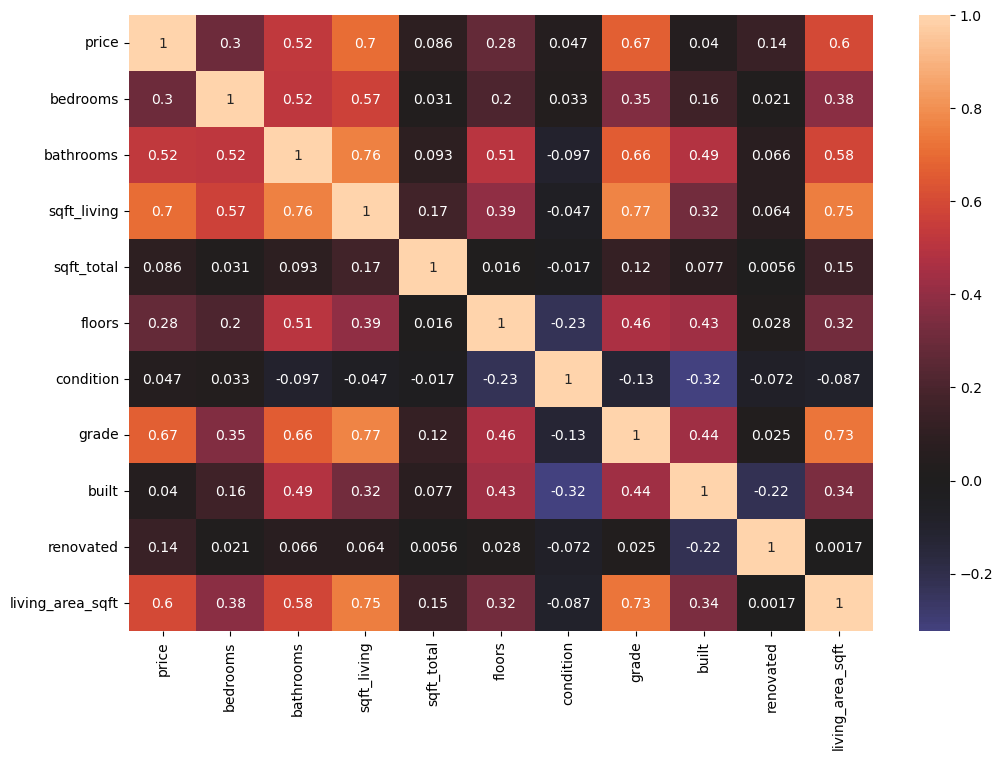

In [66]:
#Heat map showing the relationship between the different variables, after the data has been cleaned.
plt.figure(figsize=(12,8))
sns.heatmap(Cleaned_Data.corr(),annot=True, center=0)

In [67]:
# ---------- SECTION 5: VISUALIZE DATA TO PREDICT TRENDS ----------

In [68]:
#PRICE VS BEDROOMS

In [69]:
#predicting price using the number of bedrooms to get an idea of the relationship between the two variables.

Bedroom Model:
Price = 119124.06 × bedrooms + 134442.44

R-squared: 0.0916


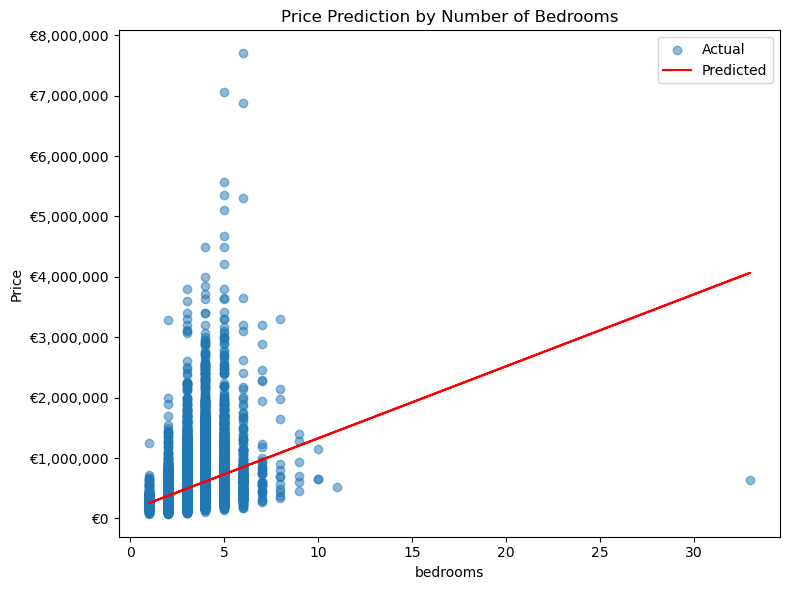

In [70]:
#Creating the model to predict price using number of bedrooms with linear regression.The model indicated that the equation for 
#the relationship between the two variables is: price=119,125.83×bedrooms+134439.357 which means, for each additional bedroom, the Price increases 
#by €119,125.83, on average.

model_bedroom = LinearRegression()
model_bedroom.fit(Cleaned_Data[['bedrooms']], Cleaned_Data['price'])
bedroom_pred = model_bedroom.predict(Cleaned_Data[['bedrooms']])

#Calcualting the R2. In this case, the model reveals that 9.16% of price can be explained by the number of bedrooms. Which means that there are other variables that
#would be better predictors of price than the number of bedrooms.
r2 = r2_score(Cleaned_Data['price'], bedroom_pred)

#Printing the equation for the model
print("Bedroom Model:") #For each additional bedroom, the Price increases by $119,125.83, on average
print(f"Price = {model_bedroom.coef_[0]:.2f} × bedrooms + {model_bedroom.intercept_:.2f}\n")
print(f"R-squared: {r2:.4f}")

#Plotting the model
fig, ax = plt.subplots(figsize=(8, 6))

#formatting price as a currency
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '€{:,.0f}'.format(x)))

ax.scatter(Cleaned_Data['bedrooms'], Cleaned_Data['price'], alpha=0.5, label='Actual')
ax.plot(Cleaned_Data['bedrooms'], bedroom_pred, 'r-', label='Predicted')

# adding Labels and title to the chart
ax.set_xlabel('bedrooms')
ax.set_ylabel('Price')
ax.set_title('Price Prediction by Number of Bedrooms')
ax.legend()

plt.tight_layout()
plt.show()


In [71]:
#The number of bedrooms is might not be the best predictor of price because it has a correlation of 0.3. Grade and sqft_living might be better predictors of price because these variables 
#have the highest correlation of 0.67 and 0.7 respectively.Linear regression will be used to predict how price relates to these variables. 

In [72]:
#PRICE VS GRADE

Grade Model:
Price = 208332.97 × grade + -1049101.88

R-squared: 0.4434


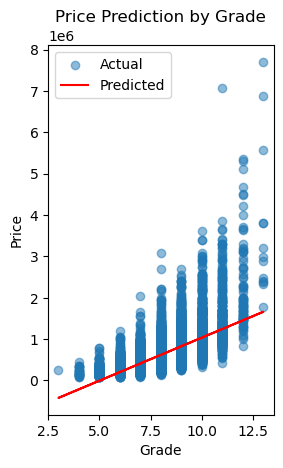

In [74]:
#Creating the model to predict price using grade with linear regression
model_grade = LinearRegression()
model_grade.fit(Cleaned_Data[['grade']], Cleaned_Data['price'])
grade_pred = model_grade.predict(Cleaned_Data[['grade']])

#Calculating the R squared which looks at the proportion of price that can be explained by grade.In this case,44% of the price can be explained by the grade of a property.
r2 = r2_score(Cleaned_Data['price'], grade_pred)

# Printing equation for the grade model
print("Grade Model:") #For every 1 unit that grade increases, price increases by $208,280.87
print(f"Price = {model_grade.coef_[0]:.2f} × grade + {model_grade.intercept_:.2f}\n")
print(f"R-squared: {r2:.4f}")

# Plotting the grade model
plt.subplot(1, 2, 1)
plt.scatter(Cleaned_Data['grade'], Cleaned_Data['price'], alpha=0.5, label='Actual')
plt.plot(Cleaned_Data['grade'], grade_pred, 'r-', label='Predicted')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Price Prediction by Grade')
plt.legend() 

In [ ]:
#PRICE VS SQFT_LIVING

In [ ]:
#Creating a model to predict price using sqft_living using linear regression
model_sqft = LinearRegression()
model_sqft.fit(Cleaned_Data[['sqft_living']], Cleaned_Data['price'])
sqft_pred = model_sqft.predict(Cleaned_Data[['sqft_living']])

#calculating the R2 which shows that 49% of the price can be explained by sqft_living
r2 = r2_score(Cleaned_Data['price'], sqft_pred)

# Printing equation for the grade model
print("Square Footage Model:")#For every additional square foot of living space, the Price increases by $283.42, on average.
print(f"Price = {model_sqft.coef_[0]:.2f} × sqft_living + {model_sqft.intercept_:.2f}")
print(f"R-squared: {r2:.4f}")

# Plot for the sqft_living room vs price model
plt.subplot(1, 2, 2)
plt.scatter(Cleaned_Data['sqft_living'], Cleaned_Data['price'], alpha=0.5, label='Actual')
plt.plot(Cleaned_Data['sqft_living'], sqft_pred, 'r-', label='Predicted')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.title('Price Prediction by Square Footage')
plt.legend()

In [ ]:
#FLOORS VS SQFT_TOTAL

In [ ]:
#calculating the correlation between floors and sqft_total
correlation = Cleaned_Data['floors'].corr(Cleaned_Data['sqft_total'])
print(f"Pearson Correlation (r): {correlation:.2f}")
# Preparing the data to create the model
X = Cleaned_Data[['floors']]  # Feature
y = Cleaned_Data['sqft_total']  # Target

# Fit regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plotting the model. There is a correlation of 0.02 which is close to zero which indicates that no linear relationship exists between the two variables.
#The scatter shows that square footage does not increase with the number of floors. It can be observed that 1 floor homes have a range of square footage and 3-floor homes are 
#potentially smaller per-square footage.
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.6, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title(f"Floors vs. Total Sqft (r = {correlation:.2f})", fontsize=14)
plt.xlabel("Number of Floors", fontsize=12)
plt.ylabel("Total Square Footage", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()